In [1]:
!pip install numpy


[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install matplotlib


[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install pandas


[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install scikit-learn


[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.cluster import KMeans

# **Create input function from given text**

* Ex:
'1 2 3      
4 5 6   =>[[1,2,3],[4,5,6],[7,8,9]]  
7 8 9'

In [6]:
#Create an inputting function for a 2D array from text
def inputX(x): #x is str
    x=x.split('\n')
    res=[]
    for i in x:
        i=i.split()
        temp=[]
        for j in i:
            temp.append(int(j))
        res.append(temp)
    return res


In [7]:
s='''65 55
70 52
45 42
61 34
37 31'''
arr=inputX(s)

In [8]:
print('output:\n {}'.format(arr))

output:
 [[65, 55], [70, 52], [45, 42], [61, 34], [37, 31]]


# **Doing all the statistic calculation in K-Means (Means, Variance,...)**

In [9]:
arr=np.array(arr) #Set up numpy array

In [10]:
sumCols=np.sum(arr, axis=0) #Sum by cols

In [11]:
meanCols=np.mean(arr, axis=0) #Mean by cols

In [12]:
meanAll=np.mean(arr) #Meam of the dataset

In [13]:
#Defined n and other variables
n=arr.shape[0] #Row
m=arr.shape[1] #Col

In [14]:
#Make all the available for all function
global sumCols, meanCols, meanAll, n, m

In [15]:
print('Sum of col: {} \n Mean of col: {}'.format(sumCols, meanCols))
print('Mean: {}'.format(meanAll))
print(f'Shape: {m}, {n}')

Sum of col: [278 214] 
 Mean of col: [55.6 42.8]
Mean: 49.2
Shape: 2, 5


> **Variance**

> Population Variance:
> * $$\sigma_j^2 = \frac{\sum_{i=1}^{N} (x_{ij} - \mu_j)^2}{N}$$

>Sample Variance:
> * $$s_j^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_{ij} - \bar{x}_j)^2$$

>Covariance:
>* $$s_{jk} = \frac{1}{n-1} \sum_{i=1}^{n} (x_{ij} - \bar{x}_j)(x_{ik} - \bar{x}_{k})$$

In [16]:
#Variance

In [17]:
def variance(arr):
    var=[]
    for i in range(m):
        var.append(math.sqrt(np.sum((arr[:,i]-meanCols[i])**2)/(m)))
        print('Variance of col #{}: {}'.format(i+1, var[i]))
    return var

In [18]:
#Sample Variance

In [19]:
def sample_variance(arr):
    sV=[]
    for i in range(m):
        sumVals=0 #Restoring sum of square difs

        for j in arr[:,i]: #Taking only columns in the array
            sumVals+=(j-meanCols[i])**2

        sV.append(math.sqrt(sumVals/(n-1)))
        print('Variance of col #{}: {}'.format(i+1, sV[i]))
    return sV

In [20]:
#Covariance *Note: Only make calculation by given j, and k

In [21]:
# c=c1=0 #Checking variables (Conds Vars)
# while c==c1 or (c not in range(m) or c1 not in range(m)): # Only allow j<>k and j,k in range of row length
#     c=j_val=int(input('Enter j: '))-1
#     c1=k_val=int(input('Enter k: '))-1

def covariance(arr, j_val, k_val):
    coVariance=0
    sumVals=0 #Restoring sum of (xij−x¯j)(xik−x¯k)
    for i in range(n): #Interate through each row
        sumVals+=(arr[i][j_val]-meanCols[j_val])*(arr[i][k_val]-meanCols[k_val]) #(xij−x¯j)(xik−x¯k)

    coVariance=sumVals/(n-1)
    print('Covariance of values on col #{} and col #{}: {}'.format(j_val, k_val,coVariance))
    return coVariance

> **Normalization, Standardization**

>> standardization:
> * $$x' = \frac{x - \bar{x}}{\sigma} $$

>> min-max normalization:
> * $$x' = \frac{\sum_{i=1}^{n} (x_{ij} - x_{min})}{x_{max}-x_{min}} $$


In [22]:
#Normalization

In [23]:
def normalization(arr):
    norm=[] #Create empty restoring place
    for i in range(m):
        print(f'Col #{i}:', end=' ')
        norm.append((arr[:,i]-arr[:,i].min())/(arr[:,i].max()-arr[:,i].min()))
        print(norm[i])
    return norm


In [24]:
#Standardization

In [25]:
def standardization(arr):
    standardization=[] #z-scores
    for i in range(m):
        print(f'Col #{i}:', end=' ')
        standardization.append((arr[:,i]-meanCols[i])/sample_variance[i])
        print(standardization[i])
    return standardization

In [26]:
#Standard deviation
std=variance(arr)

Variance of col #1: 19.788885769542457
Variance of col #2: 15.013327412669051


# **Euclidean Distance **

> * $$d(x,y) = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2 + \dots + (x_n - y_n)^2}$$



In [27]:
dists=[np.linalg.norm(arr[i]-meanAll) for i in range(m)] #Calculate the distance from points to mean of dataset

In [28]:
print('Dists: {}'.format(dists))

Dists: [16.830923919975394, 20.987615395751845]


# **Plotting**

>* Only for 2 first cols


In [29]:
#Generating all ele by funcs
norm=np.array(normalization(arr))
standardization=np.std(norm, axis=1)
meanNor=np.mean(norm, axis=1)



Col #0: [0.84848485 1.         0.24242424 0.72727273 0.        ]
Col #1: [1.         0.875      0.45833333 0.125      0.        ]


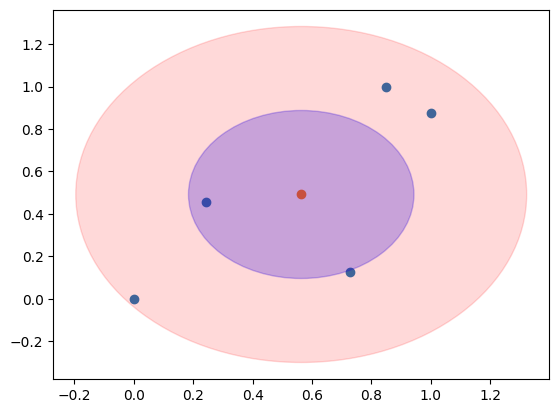

In [30]:
ellipse = patches.Ellipse(
    [mean for mean in meanNor],
    standardization[0] * m, # Access the first element of the array
    standardization[1] * m, # Access the first element of the array
    alpha=0.25,
    color='blue'
)

#The second standard deviation can cover the whole data account for all the outliers
ellipse2 = patches.Ellipse(
    [mean for mean in meanNor],
    2*standardization[0] * m, # Access the first element of the array
    2*standardization[1] * m, # Access the first element of the array
    alpha=0.15,
    color='red'
)

fig, graph=plt.subplots()

graph.scatter(norm[0], norm[1]) # Change normalization to norm
graph.scatter(meanNor[0], meanNor[1])
graph.add_patch(ellipse)
graph.add_patch(ellipse2)
plt.show()

# **Using with REAL DATA!**

> Link to the dataset: [here](https://d3c33hcgiwev3.cloudfront.net/em-9EhjTEemU7w7-EFnPcg_7aa34fc018d311e980c2cb6467517117_happyscore_income.csv?Expires=1727827200&Signature=FfGRNLA2ic-Fl2vFvBeL80wb9YL8ck3S6PDVQ7FsqkA-Pev0L9uyhJSO2GQ~mc-CEBFMYCnslXfyqzVMco625UBp0uF-vaeSkW9Zb-N~orTbpSknlaZI1jk0BGN0I7gFS60rdL38HCDRt5TQ~8nOmurWruikYPPDTx2u-jq5gFA_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A)

> Description: happyscore_income.csv, has been downloaded and saved to local drive.

> Path: /content/drive/MyDrive/K-Mean_Dataset/happyscore_income.csv

In [31]:
#Using pandas as data normalizer tool.
dt=pd.read_csv('D:\K-Means\happyscore_income.csv')
dt.head()

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola
2,Argentina,60.0,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina
3,Austria,59.0,7.2,2.11,19457.04,16879.620000,30.296250,'Western Europe',7.200,1.33723,Austria
4,Australia,65.0,7.6,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358,Australia


In [32]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                111 non-null    object 
 1   adjusted_satisfaction  111 non-null    float64
 2   avg_satisfaction       111 non-null    float64
 3   std_satisfaction       111 non-null    float64
 4   avg_income             111 non-null    float64
 5   median_income          111 non-null    float64
 6   income_inequality      111 non-null    float64
 7   region                 111 non-null    object 
 8   happyScore             111 non-null    float64
 9   GDP                    111 non-null    float64
 10  country.1              111 non-null    object 
dtypes: float64(8), object(3)
memory usage: 9.7+ KB


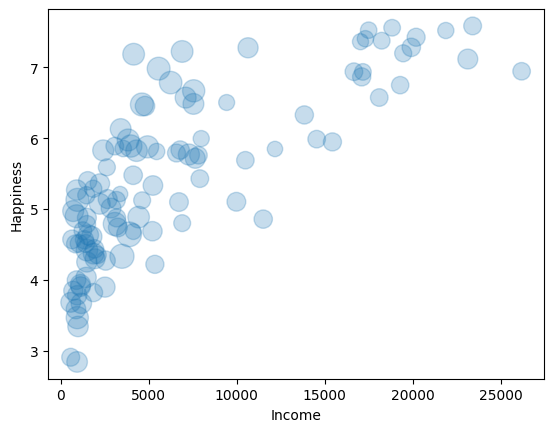

In [33]:
#Scatter the dataset for overall look with the relationship of happy and income
happy=dt['happyScore']
income=dt['avg_income']
iqe=dt['income_inequality']

plt.xlabel('Income')
plt.ylabel('Happiness')
plt.scatter(income,happy,s=iqe*5, alpha=0.25)

In [34]:
#Create some filters
dt.sort_values('avg_income', inplace=True)
richest=dt[dt['avg_income']>15000]

In [35]:
richest.iloc[:]

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
49,Italy,57.0,6.6,1.81,15437.595000,13163.070000,34.126250,'Western Europe',5.948,1.25114,Italy
44,Ireland,64.0,7.5,1.85,16657.770000,13823.160000,32.418750,'Western Europe',6.940,1.33596,Ireland
90,Sweden,67.0,7.8,1.72,17032.755000,15166.605000,26.950000,'Western Europe',7.364,1.33171,Sweden
36,United Kingdom,60.0,7.1,1.98,17099.550000,14172.735000,34.432500,'Western Europe',6.867,1.26637,United Kingdom
7,Belgium,63.0,7.2,1.72,17168.505000,15166.455000,28.745000,'Western Europe',6.937,1.30782,Belgium
33,Finland,70.0,7.9,1.53,17310.195000,14962.560000,27.723750,'Western Europe',7.406,1.29025,Finland
27,Denmark,74.0,8.4,1.53,17496.510000,15630.885000,28.155000,'Western Europe',7.527,1.32548,Denmark
34,France,52.0,6.4,2.15,18096.788571,14971.251429,32.255714,'Western Europe',6.575,1.27778,France
76,Netherlands,69.0,7.6,1.38,18234.435000,15880.545000,29.271250,'Western Europe',7.378,1.32944,Netherlands
48,Iceland,71.0,8.1,1.64,18828.345000,16179.315000,28.780000,'Western Europe',7.561,1.30232,Iceland


In [36]:
richMean=np.mean(richest['avg_income'])
allMean=np.mean(dt['avg_income'])

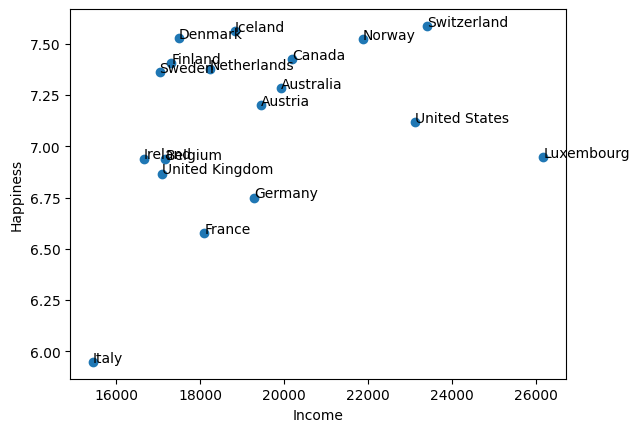

In [37]:
plt.scatter(richest['avg_income'], richest['happyScore'])
plt.xlabel('Income')
plt.ylabel('Happiness')

for id,inf in richest.iterrows():
    plt.text(inf['avg_income'], inf['happyScore'], inf['country'])

In [38]:
income_happy=np.column_stack((income, happy)) #KMeans required difference shape of data, not 1D. Therefore, mixing together avg_icome, and happyness
km_res=KMeans(n_clusters=3).fit(income_happy)

In [39]:
km_res.cluster_centers_ #(income, happy)

array([[2.24062725e+03, 4.77174242e+00],
       [1.87593022e+04, 7.03270000e+00],
       [7.68311860e+03, 5.84972000e+00]])

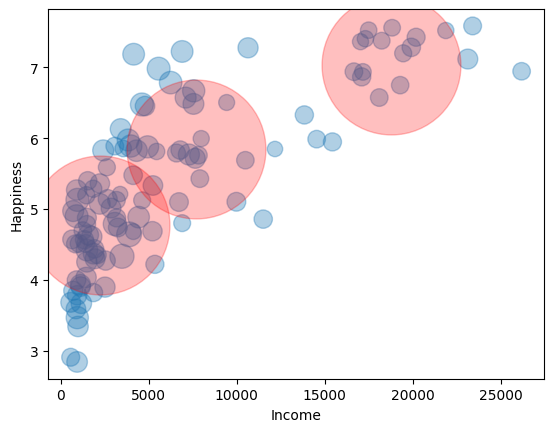

In [40]:
#Scatter the dataset for overall look with the relationship of happy and income
happy=dt['happyScore']
income=dt['avg_income']
iqe=dt['income_inequality']

plt.xlabel('Income')
plt.ylabel('Happiness')
plt.scatter(income,happy,s=iqe*5, alpha=0.35)
plt.scatter(km_res.cluster_centers_[:,0], km_res.cluster_centers_[:,1], color='red', s=10000, alpha=0.25)

As we can easily recognize, the **avg_income** contain large integers, or the amount of money. Hence, it can affect the performance of K-Means. As well, I want my final result to be closer to this pic below which is more accurate.

>
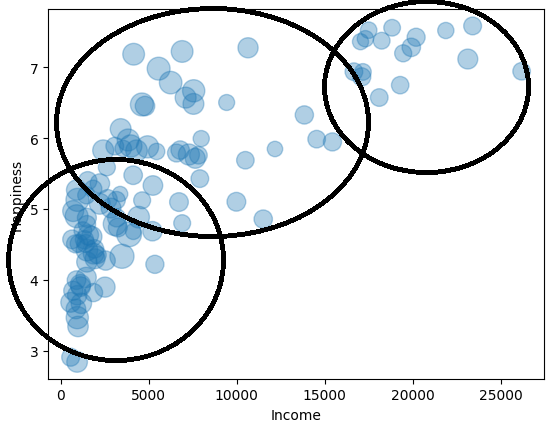

Therefore, we apply normalization to the data to get more accurate data rather than the raw input

In [52]:
income_happy=np.column_stack((income, happy,iqe)) #KMeans required difference shape of data, not 1D. Therefore, mixing together avg_icome, and happyness
km_res=KMeans(n_clusters=3).fit(income_happy)

In [53]:
#Using normalization function, created before.
norm=np.array(normalization(income_happy))

#standardization for more visualize the spread of points from the centre.
standardization=np.std(norm, axis=1)
meanNor=np.mean(norm, axis=1)

Col #0: [0.00000000e+00 5.15435839e-05 3.13010128e-03 5.53859238e-03
 5.68228964e-03 1.08241526e-02 1.16347926e-02 1.29022962e-02
 1.31108134e-02 1.31764144e-02 1.41932287e-02 1.43900315e-02
 1.45899581e-02 1.49898114e-02 1.62502863e-02 1.86587774e-02
 2.16170667e-02 2.19528810e-02 2.36163330e-02 2.70392955e-02
 3.06515636e-02 3.33955566e-02 3.42061966e-02 3.47909820e-02
 3.58321624e-02 3.58790202e-02 3.59165064e-02 3.60863660e-02
 3.78324973e-02 3.92106100e-02 4.66891155e-02 4.99722856e-02
 5.06001801e-02 5.08547742e-02 5.27056574e-02 5.40577654e-02
 5.95047247e-02 6.44913322e-02 6.47621703e-02 7.20954165e-02
 7.60689583e-02 7.75262360e-02 8.02098493e-02 8.20309444e-02
 8.94984048e-02 9.77922360e-02 9.79156282e-02 1.01574832e-01
 1.01873551e-01 1.04586618e-01 1.09675375e-01 1.10819226e-01
 1.13700460e-01 1.16449972e-01 1.27405327e-01 1.29500912e-01
 1.33264765e-01 1.38528068e-01 1.38886530e-01 1.39601892e-01
 1.46031824e-01 1.50643153e-01 1.57956986e-01 1.58419540e-01
 1.64768438e-01 

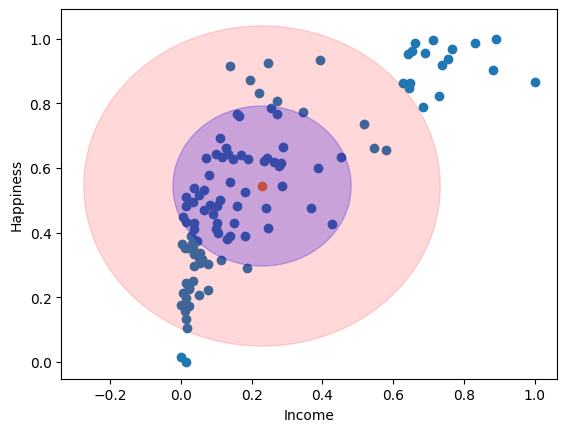

In [54]:
ellipse = patches.Ellipse(
    [mean for mean in meanNor],
    standardization[0] * m, # Access the first element of the array
    standardization[1] * m, # Access the first element of the array
    alpha=0.25,
    color='blue'
)

#The second standard deviation can cover the whole data account for all the outliers
ellipse2 = patches.Ellipse(
    [mean for mean in meanNor],
    2*standardization[0] * m, # Access the first element of the array
    2*standardization[1] * m, # Access the first element of the array
    alpha=0.15,
    color='red'
)

fig, graph=plt.subplots()

plt.xlabel('Income')
plt.ylabel('Happiness')

graph.scatter(norm[0], norm[1]) # Change normalization to norm
graph.scatter(meanNor[0], meanNor[1])

graph.add_patch(ellipse)
graph.add_patch(ellipse2)
plt.show()

With the illustration above, we can confirm that the original data is transformed from 3->7 to the scale of 0->1, and so on with the avg_icome

In [55]:
def reshaped(arr):
    arr=np.array(arr)
    col=len(arr)
    row=len(arr[0])
    res=np.array([[None]*col]*row)
    for i in range(len(arr)):
        res[:,i]=arr[i]
    return res


In [56]:
#Because, with my norm function it returned the array with shape [[values of col 1],[values of col 2],...,[values of col n]] which is difference from our origin input for K-Means
reshaped_norm=reshaped(norm) #Reshaped the data from [[a1, a2, ..., an], [b1, b2, ..., bn]]
#to
# [[a1, b1],
#  [a2, b2],
#  ...
#  [an, bn]]
km_res_new=KMeans(n_clusters=3).fit(reshaped_norm)

# Plotting and Enjoy!

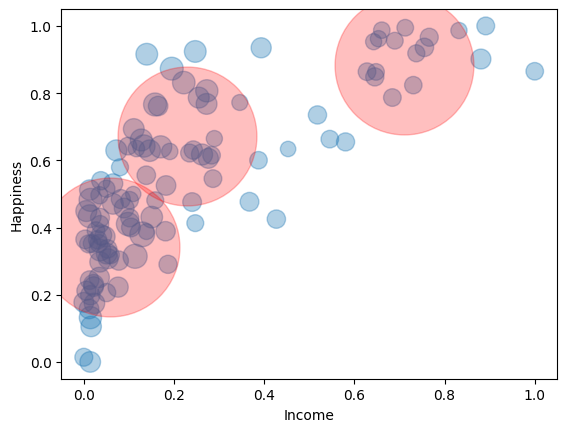

In [57]:
plt.xlabel('Income')
plt.ylabel('Happiness')
plt.scatter(reshaped_norm[:,0],reshaped_norm[:,1],s=iqe*5, alpha=0.35)
plt.scatter(km_res_new.cluster_centers_[:,0], km_res_new.cluster_centers_[:,1], color='red', s=10000, alpha=0.25)

>


*We can clearly see it has improved much better!*

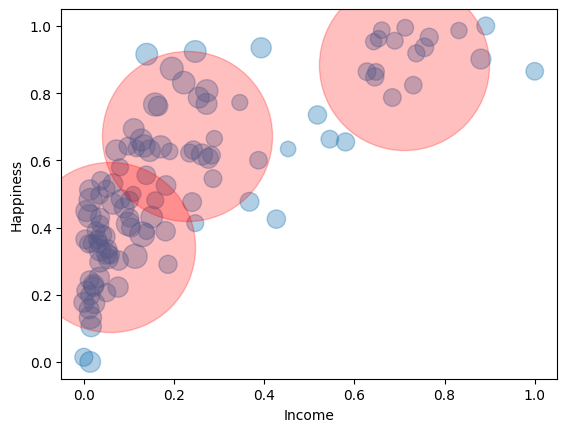

In [58]:
plt.xlabel('Income')
plt.ylabel('Happiness')
plt.scatter(reshaped_norm[:,0],reshaped_norm[:,1],s=iqe*5, alpha=0.35)
plt.scatter(km_res_new.cluster_centers_[:,0], km_res_new.cluster_centers_[:,1], color='red', s=15000, alpha=0.25)

*Now increase the size of the clusters to see the final result more clearly.*

In [60]:
cluster_labels=km_res_new.labels_
for i, label in enumerate(cluster_labels):
    print(f"Data point {i} is in cluster {label}")

Data point 0 is in cluster 0
Data point 1 is in cluster 0
Data point 2 is in cluster 0
Data point 3 is in cluster 0
Data point 4 is in cluster 0
Data point 5 is in cluster 0
Data point 6 is in cluster 0
Data point 7 is in cluster 0
Data point 8 is in cluster 0
Data point 9 is in cluster 0
Data point 10 is in cluster 0
Data point 11 is in cluster 0
Data point 12 is in cluster 0
Data point 13 is in cluster 0
Data point 14 is in cluster 0
Data point 15 is in cluster 0
Data point 16 is in cluster 0
Data point 17 is in cluster 0
Data point 18 is in cluster 0
Data point 19 is in cluster 0
Data point 20 is in cluster 0
Data point 21 is in cluster 0
Data point 22 is in cluster 0
Data point 23 is in cluster 0
Data point 24 is in cluster 0
Data point 25 is in cluster 0
Data point 26 is in cluster 0
Data point 27 is in cluster 0
Data point 28 is in cluster 0
Data point 29 is in cluster 0
Data point 30 is in cluster 0
Data point 31 is in cluster 0
Data point 32 is in cluster 0
Data point 33 is in 

And we can see points belong to different clusters. 

In [61]:
#Create a clusters label for our dataset and apply the clusters.
dt['Cluster']=cluster_labels
dt.head()

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1,Cluster
10,Burundi,25.0,2.9,1.96,572.88,436.92,33.360000,'Sub-Saharan Africa',2.905,0.01530,Burundi,0
65,Madagascar,33.0,3.7,1.86,574.20,415.48,40.720000,'Sub-Saharan Africa',3.681,0.20824,Madagascar,0
58,Liberia,37.0,4.4,2.02,653.04,528.72,36.480000,'Sub-Saharan Africa',4.571,0.07120,Liberia,0
72,Mozambique,34.0,3.8,1.76,714.72,488.52,45.580000,'Sub-Saharan Africa',4.971,0.08308,Mozambique,0
73,Niger,34.0,3.8,1.75,718.40,535.56,37.726667,'Sub-Saharan Africa',3.845,0.06940,Niger,0


*Then, we attach the cluster labels to our original dataframe for better understanding.*

# Final Touch Down!

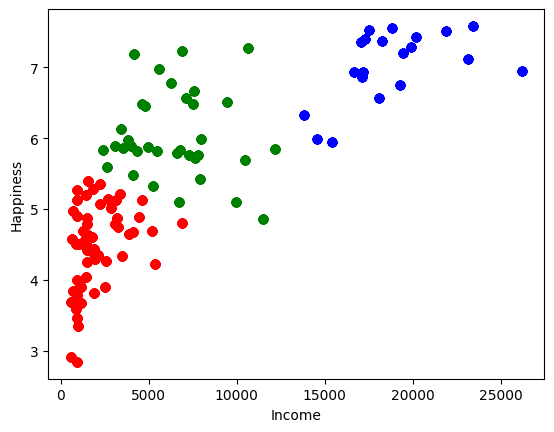

In [62]:
plt.xlabel('Income')
plt.ylabel('Happiness')
colors=['red','blue','green']
# Loop through each cluster
for i in cluster_labels:
    cluster = dt[dt['Cluster'] == i]
    for id, inf in cluster.iterrows():
        plt.scatter(inf['avg_income'], inf['happyScore'], color=colors[i])


# EXPORT TO PDF

In [50]:
!pip install nbconvert PyPDF2


[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
!set PATH=/Library/TeX/texbin:$PATH